# bar charts
with Formula 1 data from https://ergast.com/mrd/db

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from tools import DATADIR, F1_ZIPPED
from etl.ergast import ErgastF1
from viz.plot import Plot

f1 = ErgastF1(F1_ZIPPED)
plot = Plot('dark_background')
folder = DATADIR / 'plots'

Autosave disabled


In [2]:
points = (
    f1.team_results
    .loc[lambda df: df['points'].gt(0)]
    .join(f1.races['season round race'.split()], on='id_race')
    .join(f1.teams['team'], on='id_team')
    ['season race round points team'.split()]
    .sort_values('season round points'.split())
    .reset_index(drop=True)
)
points['race'] = points['race'].str.replace('Grand Prix', 'GP')

## colors of money

In [3]:
from collections import defaultdict

color = defaultdict(lambda: '#000000')
color['Arrows'] = color['Footwork'] = '#ffffbb'
color['BAR'] = color['Honda'] = '#77bb77'
color['Benetton'] = '#00bb00'
color['BMW'] = color['BMW Sauber'] = color['Sauber'] = '#ffffff'
color['Brawn'] = '#bbff00'
color['Ferrari'] = '#ff0000'
color['Force India'] = color['Racing Point'] = '#ffbbbb'
color['Jordan'] = '#ffff00'
color['Ligier'] = color['Prost'] = '#0000ff'
color['March'] = color['Leyton House'] = '#77ffff'
color['McLaren'] = '#ff7700'
color['Mercedes'] = '#bbbbbb'
color['Red Bull'] = '#770077'
color['Renault'] = '#00bbff'
color['Stewart'] = color['Jaguar'] = '#007700'
color['Toro Rosso'] = '#000077'
color['Toyota'] = '#ff3333'
color['Tyrrell'] = '#770000'
color['Williams'] = '#0000bb'

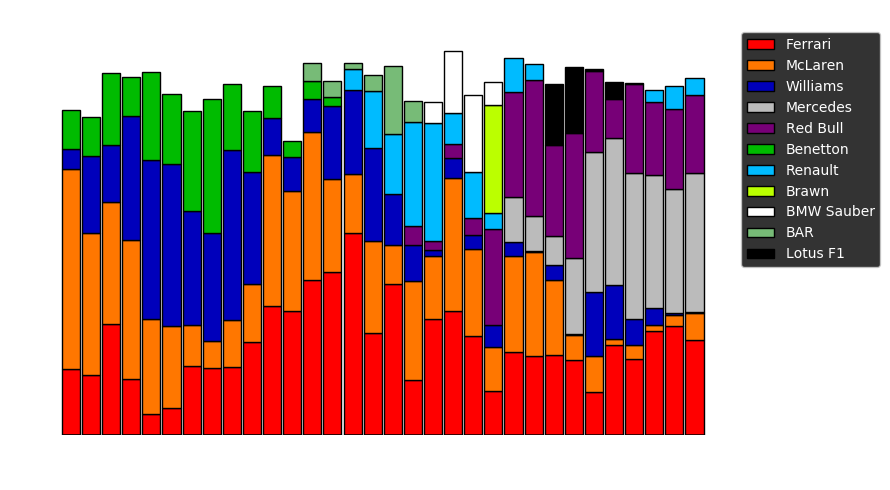

In [4]:
def yearshare(start, stop, n=11, **kwargs):
    data = (
        points.loc[points['season'].between(start, stop)]
        .groupby('season team'.split())
        ['points'].sum().unstack('team', fill_value=0)
    )
    data = 100 * data.div(data.sum(axis=1), axis=0)
    data = data[data.max().nlargest(n).index]
    
    kwargs.setdefault('color', data.columns.map(color))
    kwargs.setdefault('edgecolor', 'black')
    kwargs.setdefault('title', f"point share")
    kwargs.setdefault('ylabel', '% of all points')    
    
    return plot.bar(data, **kwargs)
    
axes = yearshare(1988, 2019)
axes.figure.savefig(folder / 'colors_of_money.png')

## hammer time

In [5]:
def racepoints(season, n=7, **kwargs):
    data = (
        points.loc[points['season'].eq(season)]
        .groupby('race team'.split(), sort=False)
        ['points'].sum().unstack('team', fill_value=0)
    )    
    data = data[data.sum().nlargest(n).index]
    
    kwargs.setdefault('color', data.columns.map(color))
    kwargs.setdefault('edgecolor', 'black')
    kwargs.setdefault('title', f"{season} team points")
    
    return plot.barh(data, **kwargs)

In [6]:
from matplotlib.pyplot import close

for year in range(1988, 2020):
    fig = racepoints(year).figure
    fig.savefig(folder / str(year))
    close(fig)